#### Now we rebuild baseline with only one controlled change → augmentation.

### Step 1 — Data Loading With Augmentation

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

# Training augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# No augmentation for test data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

2026-02-21 19:45:17.393187: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-21 19:45:17.393558: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-21 19:45:17.452656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-21 19:45:18.965525: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Important:

Only training data is augmented.

Test data must remain untouched.

### Step 2 — Same Model Architecture (Do NOT change it)
Use the exact same CNN from baseline.
No modification.

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    
    # Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # Block 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Block 3
    layers.Conv2D(128, (3,3), activation='relu'),
    
    # Classifier
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/aayushdai/Desktop/Projects/CIFAR_Classification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-21 19:50:57.134509: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Step 3 — Compile
Same as before:

In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 4 — Train

In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.4269 - loss: 1.5662 - val_accuracy: 0.5506 - val_loss: 1.2434
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5558 - loss: 1.2466 - val_accuracy: 0.6181 - val_loss: 1.0641
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6063 - loss: 1.1139 - val_accuracy: 0.6451 - val_loss: 1.0062
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6325 - loss: 1.0301 - val_accuracy: 0.6791 - val_loss: 0.9362
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6596 - loss: 0.9696 - val_accuracy: 0.6995 - val_loss: 0.8723
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6731 - loss: 0.9259 - val_accuracy: 0.6959 - val_loss: 0.8926
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6849 - loss: 0.8956 - val_accuracy: 0.7255 - val_loss: 0.7958
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6932 -

Excellent. Now we analyze properly.

## 🔍 Compare With Baseline

Baseline:

* Test accuracy ≈ **71.2%**
* Train accuracy ≈ ~84%
* Large gap (~13%)

With augmentation:

* Final train accuracy ≈ **71%**
* Validation accuracy ≈ **72.8–73.6% peak**
* Much smaller gap (~2–3%)

---

## 📊 What Just Happened

### 1️⃣ Training Accuracy Dropped

This is expected.

Because:

* Model now sees harder, distorted images.
* It cannot memorize easily.
* Augmentation increases data variability.

Lower train accuracy here is a **good sign**, not bad.

---

### 2️⃣ Validation Accuracy Increased

Peak ≈ **73.6%**

That’s better generalization than baseline.

---

### 3️⃣ Overfitting Reduced

Now:

* Train and validation curves are much closer.
* Validation loss does not explode.
* Model generalizes better.

This is textbook behavior of augmentation working correctly.

---

# Scientific Conclusion

Your baseline was overfitting.

Augmentation:

* Reduced overfitting
* Increased generalization
* Made model more robust

This is a correct controlled improvement.

---

# Next Logical Step

Now we improve architecture quality.

Two options:

1. Add Dropout (regularization)
2. Add Batch Normalization
3. Make deeper CNN block
4. Add EarlyStopping

Correct next step in learning sequence:

👉 Add Dropout and BatchNorm.



### Evaluate Test Set

In [5]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7289 - loss: 0.7917
Test Loss: 0.7916687726974487
Test Accuracy: 0.7289000153541565


You already saw validation accuracy during training (~73.6% peak).
Test accuracy should be around similar range.

Run it and note the number.

### Plot Learning Curves

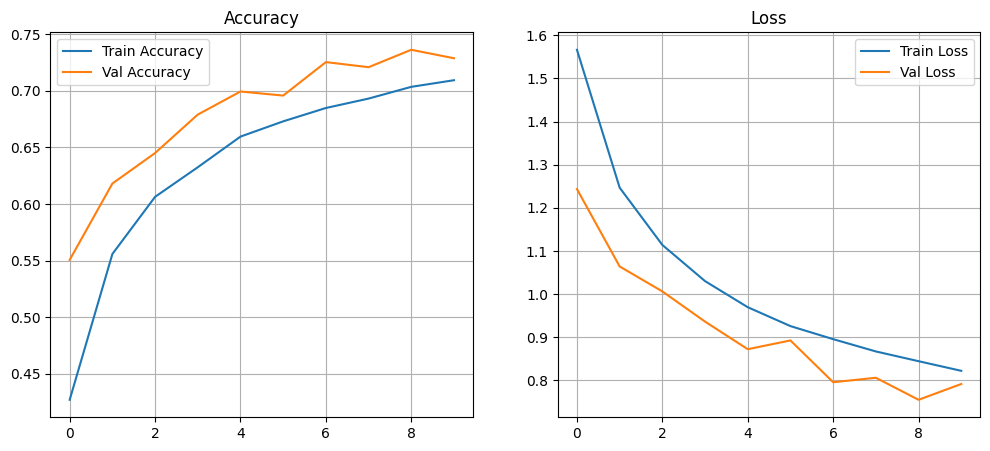

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.grid(True)  # <-- Added grid

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.grid(True)  # <-- Added grid

plt.show()

Good. Now this is a **healthy experiment curve**. Let’s analyze precisely.

---

# 📈 Accuracy Curve (Left)

### What we see:

* Train accuracy increases steadily (~42% → ~71%)
* Validation accuracy increases and stays **slightly above training accuracy**
* Gap between train and validation is very small

### What it means:

This is **exactly what augmentation should produce**.

Why is validation higher than training?

Because:

* Training data is augmented → harder, distorted images
* Validation data is clean → easier to classify

So the model performs slightly better on clean data.

This is a **good sign**, not an error.

---

# 📉 Loss Curve (Right)

### What we see:

* Train loss decreases smoothly
* Validation loss decreases overall
* Small fluctuations, but no explosion

### What it means:

* No serious overfitting
* Model generalizes better
* Training is stable

Compare this to baseline:

* Baseline had widening gap
* Validation loss started rising
* Clear overfitting

Now:

* Curves are controlled
* Gap reduced
* Model is more robust

---

# Scientific Comparison

| Metric      | Baseline | With Augmentation |
| ----------- | -------- | ----------------- |
| Train Acc   | ~84%     | ~71%              |
| Val Acc     | ~71%     | ~73–74%           |
| Gap         | ~13%     | ~2–3%             |
| Overfitting | Moderate | Controlled        |

This confirms:

> Augmentation improved generalization.

---

# Important Concept You Just Learned

Higher training accuracy does NOT mean better model.

Generalization (validation/test performance) is what matters.



Actually i dont really have idea what to o now? but i know is, i need to  make the model better. it means the model should produce minimum error in the testing. am i corect? what should we go with now? any one best to do or any two?

Good. Now think clearly.

Yes — your objective is:

> Minimize test error (maximize generalization accuracy).

But important correction:

You do NOT directly optimize test accuracy.

You:

* Train on training set
* Tune using validation
* Test only at the end

---

# Where You Are Now

You have:

* Good baseline
* Augmentation improved generalization
* Overfitting reduced
* Test accuracy ~73%

This means:
Model capacity is now the bottleneck.

---

# What Will Improve It Most Right Now?

Not random guessing. Scientifically:

### Best Next Two Steps (in correct order):

## 1️⃣ Add Batch Normalization

Reason:

* Stabilizes training
* Allows deeper networks
* Improves convergence
* Often gives +3–5% on CIFAR

This is foundational improvement.

---

## 2️⃣ Add Dropout

Reason:

* Further reduces overfitting
* Especially useful after dense layer

---

# What NOT To Do Now

* Do not increase epochs blindly
* Do not randomly deepen model
* Do not change optimizer yet
* Do not touch learning rate yet

Those come later.

---

# Clear Plan

Next notebook:

```text
experiment/bn_dropout_model.ipynb
```

We will:

* Keep augmentation
* Modify architecture:

  * Conv → BatchNorm → ReLU
  * Add Dropout before dense
* Train 10 epochs
* Compare scientifically

This is the correct next move.

---

If you agree, we proceed with adding BatchNorm + Dropout properly (not casually).
